# Loading Dataset

In [1]:
import pandas as pd

# Load the datasets
games_df = pd.read_csv('dataset/games.csv')
recommendations_df = pd.read_csv('dataset/recommendations.csv')
users_df = pd.read_csv('dataset/users.csv')
games_metadata_df = pd.read_json('dataset/games_metadata.json', lines=True)

In [2]:
def reduce_memory_usage(df):
    initial_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)  # Convert to MB
    print(f'Initial memory usage of DataFrame: {initial_memory:.2f} MB')
    for col in df.columns:
        col_type = df[col].dtype
        if col_type == 'object':  # Optimize object types
            df[col] = df[col].astype('category')
        elif col_type in ['int64', 'int32']:  # Optimize integer types
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif col_type in ['float64', 'float32']:  # Optimize float types
            df[col] = pd.to_numeric(df[col], downcast='float')

    final_memory = df.memory_usage(deep=True).sum() / (1024 ** 2)  # Convert to MB
    print(f'Final memory usage of DataFrame: {final_memory:.2f} MB')
    print(f'Reduction in memory usage: {initial_memory - final_memory:.2f} MB')
    return df

In [3]:
games_df = reduce_memory_usage(games_df)
recommendations_df = reduce_memory_usage(recommendations_df)
users_df = reduce_memory_usage(users_df)

Initial memory usage of DataFrame: 11.86 MB
Final memory usage of DataFrame: 7.66 MB
Reduction in memory usage: 4.20 MB
Initial memory usage of DataFrame: 4238.81 MB
Final memory usage of DataFrame: 981.58 MB
Reduction in memory usage: 3257.23 MB
Initial memory usage of DataFrame: 327.44 MB
Final memory usage of DataFrame: 109.15 MB
Reduction in memory usage: 218.29 MB


# EDA

In [4]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   app_id          50872 non-null  int32   
 1   title           50872 non-null  category
 2   date_release    50872 non-null  category
 3   win             50872 non-null  bool    
 4   mac             50872 non-null  bool    
 5   linux           50872 non-null  bool    
 6   rating          50872 non-null  category
 7   positive_ratio  50872 non-null  int8    
 8   user_reviews    50872 non-null  int32   
 9   price_final     50872 non-null  float32 
 10  price_original  50872 non-null  float32 
 11  discount        50872 non-null  float32 
 12  steam_deck      50872 non-null  bool    
dtypes: bool(4), category(3), float32(3), int32(2), int8(1)
memory usage: 4.1 MB


In [5]:
games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True


In [6]:
recommendations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype   
---  ------          -----   
 0   app_id          int32   
 1   helpful         int32   
 2   funny           int16   
 3   date            category
 4   is_recommended  bool    
 5   hours           float32 
 6   user_id         int32   
 7   review_id       int32   
dtypes: bool(1), category(1), float32(1), int16(1), int32(4)
memory usage: 981.4 MB


In [7]:
games_df.isnull().sum()

app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64

In [8]:
recommendations_df.head()

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.299999,51580,0
1,304390,4,0,2017-02-17,False,11.500000,2586,1
2,1085660,2,0,2019-11-17,True,336.500000,253880,2
3,703080,0,0,2022-09-23,True,27.400000,259432,3
4,526870,0,0,2021-01-10,True,7.900000,23869,4


In [9]:
recommendations_df.isnull().sum()

app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64

In [10]:
users_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int32
 1   products  int16
 2   reviews   int16
dtypes: int16(2), int32(1)
memory usage: 109.1 MB


In [11]:
users_df.head()

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2


In [12]:
users_df.isnull().sum()

user_id     0
products    0
reviews     0
dtype: int64

In [13]:
games_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   app_id       50872 non-null  int64 
 1   description  50872 non-null  object
 2   tags         50872 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
games_metadata_df.head()

,app_id,description,tags
0,13500,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,,[Action]
2,113020,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


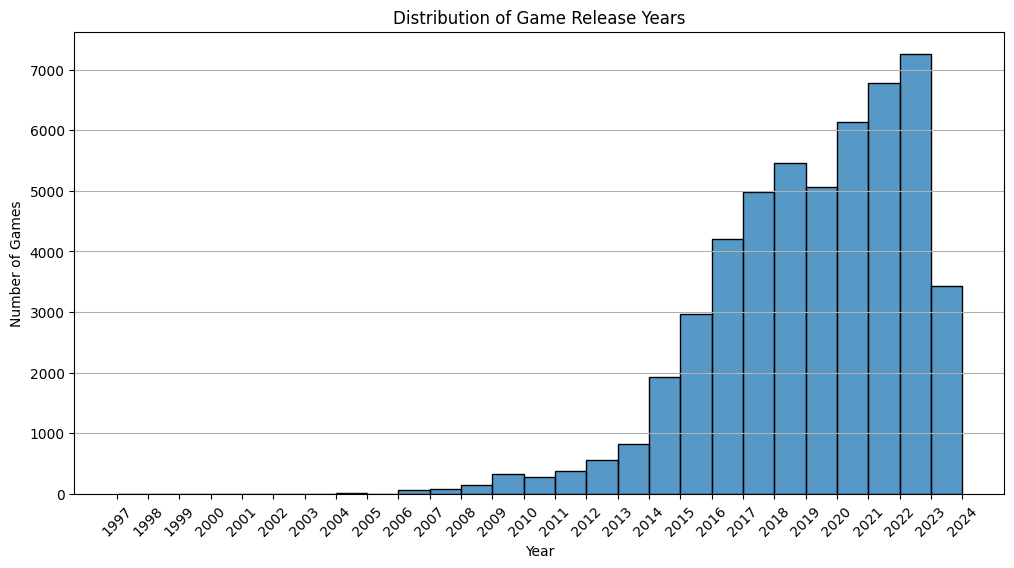

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'date_release' to datetime format if not already done
games_df['date_release'] = pd.to_datetime(games_df['date_release'])

plt.figure(figsize=(12, 6))
sns.histplot(games_df['date_release'].dt.year, bins=range(min(games_df['date_release'].dt.year), max(games_df['date_release'].dt.year) + 2), kde=False)
plt.title('Distribution of Game Release Years')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.xticks(range(min(games_df['date_release'].dt.year), max(games_df['date_release'].dt.year)+2))
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

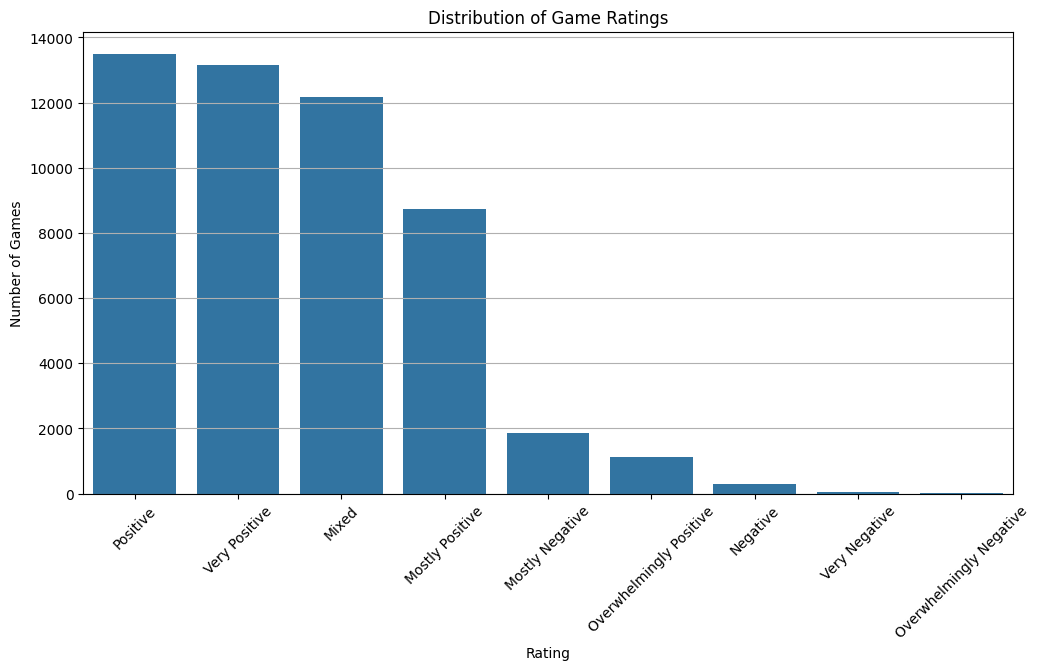

In [87]:
plt.figure(figsize=(12, 6))
sns.countplot(x='rating', data=games_df, order=games_df['rating'].value_counts().index)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Games')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


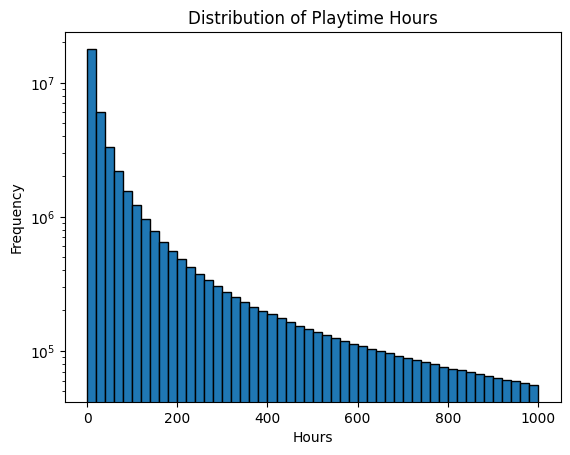

In [97]:
# Plot distribution of playtime hours
plt.hist(recommendations_df['hours'], bins=50, log=True, edgecolor='black')
plt.title('Distribution of Playtime Hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.show()

# 1. Content Based Filtering

In [4]:
# Merge games_df with games_metadata_df on 'app_id'
combined_games_df = pd.merge(games_df, games_metadata_df, on='app_id', how='inner')
combined_games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,"[Action, Adventure, Parkour, Third Person, Gre..."
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,[Action]
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,"[Co-op, Stealth, Indie, Heist, Local Co-Op, St..."
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,"[Zombies, Adventure, Survival, Action, Third P..."
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,"[Roguelike, Strategy, Tower Defense, Pixel Gra..."


In [5]:
combined_games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   app_id          50872 non-null  int32   
 1   title           50872 non-null  category
 2   date_release    50872 non-null  category
 3   win             50872 non-null  bool    
 4   mac             50872 non-null  bool    
 5   linux           50872 non-null  bool    
 6   rating          50872 non-null  category
 7   positive_ratio  50872 non-null  int8    
 8   user_reviews    50872 non-null  int32   
 9   price_final     50872 non-null  float32 
 10  price_original  50872 non-null  float32 
 11  discount        50872 non-null  float32 
 12  steam_deck      50872 non-null  bool    
 13  description     50872 non-null  object  
 14  tags            50872 non-null  object  
dtypes: bool(4), category(3), float32(3), int32(2), int8(1), object(2)
memory usage: 4.9+ MB


In [6]:
combined_games_df['tags'] = combined_games_df['tags'].apply(lambda x:' '.join(x))

In [7]:
combined_games_df['title'] = combined_games_df['title'].astype(str)

In [8]:
combined_games_df['text'] = combined_games_df['title'] + ' ' + combined_games_df['tags'] + ' ' + combined_games_df['description']

In [9]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # Remove stop words
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

In [10]:
combined_games_df['text'] = combined_games_df['text'].apply(clean_text)

In [11]:
combined_games_df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,description,tags,text
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,Enter the dark underworld of Prince of Persia ...,Action Adventure Parkour Third Person Great So...,prince persia warrior action adventure parkour...
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True,,Action,brink agents change action
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True,Monaco: What's Yours Is Mine is a single playe...,Co-op Stealth Indie Heist Local Co-Op Strategy...,monaco s op stealth indie heist local op strat...
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True,Escape Dead Island is a Survival-Mystery adven...,Zombies Adventure Survival Action Third Person...,escape dead island zombies adventure survival ...
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True,Dungeon of the Endless is a Rogue-Like Dungeon...,Roguelike Strategy Tower Defense Pixel Graphic...,dungeon endless roguelike strategy tower defen...


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer to convert text data into feature vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_games_df['text'])

In [13]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [14]:
def get_content_based_recommendations(title, cosine_sim=cosine_sim):
    # Check if the title exists in the DataFrame
    if title not in combined_games_df['title'].values:
        return print(f"Title '{title}' not found in the dataset.")

    # Find the index of the game by title
    idx_list = combined_games_df.index[combined_games_df['title'] == title].tolist()
    idx = idx_list[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the games based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the indices and scores of the top 5 most similar games
    sim_scores = sim_scores[1:6]  # Exclude itself
    game_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]
    
    # Return the titles and their similarity scores
    recommended_titles = combined_games_df['title'].iloc[game_indices].tolist()
    return list(zip(recommended_titles, scores))


In [15]:
# Example
sample_title = "Call of Duty League™ - Seattle Surge Pack 2023"
recommendations = get_content_based_recommendations(sample_title)
recommendations


[('Call of Duty League™ - Seattle Surge Team Pack 2023', 0.9694368744875478),
 ('Call of Duty League™ - Launch Pack', 0.4997490299979668),
 ('Call of Duty League™ - Vegas Legion Pack 2023', 0.48359751180771676),
 ('Call of Duty League™ - Boston Breach Pack 2023', 0.45846851158262203),
 ('The Surge 2 - Season Pass', 0.44340424696542385)]

# 2. Collaborative Filtering

In [16]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import numpy as np
# Create a sparse user-item interaction matrix
user_ids = recommendations_df['user_id'].astype('category').cat.codes
app_ids = recommendations_df['app_id'].astype('category').cat.codes
user_item_matrix = csr_matrix((recommendations_df['hours'], (user_ids, app_ids)))

In [17]:
knn_model = NearestNeighbors(n_neighbors=5, algorithm='brute', metric='cosine')

In [18]:
knn_model.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
def get_knn_recommendations(user_id_input, user_item_matrix, knn_model,n_recommendations=5):
    # Map the input user ID to its categorical code
    user_cat_codes = recommendations_df['user_id'].astype('category').cat.codes
    if user_id_input not in recommendations_df['user_id'].values:
        return print(f'User ID {user_id_input} does not exist in the dataset.') 

    mapped_user_id = user_cat_codes[recommendations_df['user_id'] == user_id_input].iloc[0]

    # Get the vector for the specific user
    user_vector = user_item_matrix[mapped_user_id]

    # Find neighbors
    distances, indices = knn_model.kneighbors(user_vector.reshape(1, -1), n_neighbors=n_recommendations + 1)

    # Retrieve similar users and their distances (skip the first result which is the user itself)
    similar_users_indices = indices.flatten()[1:]
    similar_distances = distances.flatten()[1:]

    # Map indices back to original user IDs
    similar_users_ids = recommendations_df['user_id'].astype('category').cat.categories[similar_users_indices]    
    return list(zip(similar_users_ids, similar_distances))


In [20]:
# Example usage with a sample user ID
sample_user_id = 11274058
recommendations_knn = get_knn_recommendations(sample_user_id, user_item_matrix, knn_model)
print(recommendations_knn)

[(11768552, 0.017011464), (14149963, 0.025930285), (11162362, 0.083691955), (11517037, 0.09260559), (11515990, 0.09263337)]


# 3. Hybrid Filtering 

In [21]:
def get_hybrid_recommendations(user_id_input, user_item_matrix, knn_model_cf, games_df, cosine_sim, n_recommendations=5):
    # Log initial user input
    print(f"Getting hybrid recommendations for User ID: {user_id_input}")

    # Get collaborative filtering recommendations
    similar_users_info = get_knn_recommendations(user_id_input, user_item_matrix, knn_model_cf)
    print(f"Similar Users Info: {similar_users_info}")  
    # similar_users_ids =  [t[0] for t in similar_users_info]
    # recommended_game_ids = set()
    # for user_id in similar_users_ids:
    #     games = recommendations_df[recommendations_df['user_id'] == user_id]['app_id'].unique()
    #     recommended_game_ids.update(games)


    # Aggregate games from similar users
    recommended_games_cf = set()
    for user_id, _ in similar_users_info:
        user_games = recommendations_df[recommendations_df['user_id'] == user_id]['app_id'].unique()
        # Retrieve the titles corresponding to the recommended game IDs
        game_titles = games_df[games_df['app_id'].isin(user_games)]['title'].tolist()
        recommended_games_cf.update(game_titles)
    
    print(f"Recommended Games from CF: {recommended_games_cf}")

    # Identify games liked by the target user
    target_user_games = recommendations_df[recommendations_df['user_id'] == user_id_input]['app_id'].unique()
    # Retrieve the titles corresponding to the recommended game IDs
    game_titles_target = games_df[games_df['app_id'].isin(target_user_games)]['title'].tolist()
    print(f"Games liked by User ID {user_id_input}: {game_titles_target}")

    # Get content-based recommendations for each game liked by the target user
    recommended_games_cb = set()
    for game_id in target_user_games:
        title_array = games_df.loc[games_df['app_id'] == game_id, 'title'].values
        if len(title_array) > 0:
            title = title_array[0]
            similar_games_cb = get_content_based_recommendations(title)
            print(f"Content-Based Recommendations for '{title}': {similar_games_cb}")
            recommended_games_cb.update([t for t, _ in similar_games_cb])

    print(f"Recommended Games from CB: {recommended_games_cb}")

    final_recommendations = set()

    for cf_title in recommended_games_cf:
        for cb_title in recommended_games_cb:
            if cb_title in cf_title or cf_title in cb_title:
                final_recommendations.add(cf_title)
                final_recommendations.add(cb_title)

    final_recommendations.update(recommended_games_cf)
    final_recommendations.update(recommended_games_cb)

    print(f"Final Recommendations: {final_recommendations}")

    return list(final_recommendations)[:n_recommendations]


In [22]:
# Example usage with a sample user ID
sample_user_id = 11274058
recommendations_hybrid = get_hybrid_recommendations(sample_user_id, user_item_matrix, knn_model, games_df, cosine_sim)
recommendations_hybrid

Getting hybrid recommendations for User ID: 11274058


Similar Users Info: [(11768552, 0.017011464), (14149963, 0.025930285), (11162362, 0.083691955), (11517037, 0.09260559), (11515990, 0.09263337)]
Recommended Games from CF: {"Tom Clancy's EndWar™", "Sid Meier's Civilization® V", 'The Bureau: XCOM Declassified', 'The Blackout Club', 'Iron Harvest', 'The Witcher 2: Assassins of Kings Enhanced Edition', 'Avorion', 'Hades', 'Book of Demons', 'Dead Age', 'Heroes® of Might & Magic® III - HD Edition', 'XCOM: Enemy Unknown', 'Saints Row 2', 'Warhammer 40000: Gladius - Relics of War', 'Fallout: A Post Nuclear Role Playing Game', 'Warhammer® 40000: Dawn of War® - Game of the Year Edition', 'Saints Row: The Third', "Baldur's Gate 3"}
Games liked by User ID 11274058: ['Northgard', 'Dune: Spice Wars', 'Warhammer 40000: Gladius - Relics of War', "Sid Meier's Civilization® V"]
Content-Based Recommendations for 'Dune: Spice Wars': [('Spice Road', 0.3179846903900079), ('Call of Duty®: Modern Warfare® II - Dune Stalker: Starter Pack', 0.3019725916524318),

["Sid Meier's Civilization® V",
 'XCOM: Enemy Unknown',
 'Saints Row 2',
 "Baldur's Gate 3",
 "Warhammer 40000: Gladius - T'au"]

# A/B Testing

In [29]:
# Randomly assign users to A/B test groups
np.random.seed(42)  # For reproducibility
users_df['group'] = np.random.choice(['A', 'B'], size=len(users_df), p=[0.5, 0.5])

# Display to confirm assignment
users_df.head()

,user_id,products,reviews,group
0,7360263,359,0,A
1,14020781,156,1,B
2,8762579,329,4,B
3,4820647,176,4,B
4,5167327,98,2,A


In [30]:
def recommend_for_group_A(user_id_input, games_df, n_recommendations=5):
    # Content based filtering  group A
    # Identify games liked by the target user
    target_user_games = recommendations_df[recommendations_df['user_id'] == user_id_input]['app_id'].unique()
    # Retrieve the titles corresponding to the recommended game IDs
    game_titles_target = games_df[games_df['app_id'].isin(target_user_games)]['title'].tolist()
    print(f"Games liked by User ID {user_id_input}: {game_titles_target}")

    # Get content-based recommendations for each game liked by the target user
    recommended_games_cb = set()
    for game_id in target_user_games:
        title_array = games_df.loc[games_df['app_id'] == game_id, 'title'].values
        if len(title_array) > 0:
            title = title_array[0]
            similar_games_cb = get_content_based_recommendations(title)
            print(f"Content-Based Recommendations for '{title}': {similar_games_cb}")
            recommended_games_cb.update([t for t, _ in similar_games_cb])

    print(f"Recommended Games from CB: {recommended_games_cb}")
    return list(recommended_games_cb)[:n_recommendations]

def recommend_for_group_B(user_id):
    # Hybrid model for group B
    return get_hybrid_recommendations(user_id, user_item_matrix, knn_model, games_df, cosine_sim)


In [34]:
def generate_recommendations(user_id, group):
    if group == 'A':
        return recommend_for_group_A(user_id, games_df, n_recommendations=5)
    elif group == 'B':
        return recommend_for_group_B(user_id)


In [40]:
# Example of generating recommendations for a user
user_id_example = users_df.iloc[10]['user_id']
group_example = users_df.iloc[10]['group']
generate_recommendations(user_id_example, group_example)

Games liked by User ID 7922733: ['Insurgency: Sandstorm', 'Alien: Isolation']
Content-Based Recommendations for 'Alien: Isolation': [('Alien: Isolation - Last Survivor', 0.6199378901224615), ('Alien: Isolation - Season Pass', 0.618504950406366), ('Alien: Isolation – The Trigger', 0.5082740985827648), ('Alien: Isolation - Corporate Lockdown', 0.5058580323515269), ('Alien: Isolation - Deluxe Edition DLC', 0.46407413511206896)]
Content-Based Recommendations for 'Insurgency: Sandstorm': [('Insurgency: Sandstorm - Assault Pack', 0.7864916271941943), ('Insurgency: Sandstorm - Pilot Gear Set', 0.7292527665970221), ('Insurgency: Sandstorm - Hunter Weapon Skin Set', 0.7075864175281736), ('Insurgency: Sandstorm - Bad Day Gear Set', 0.6932560081990173), ('Insurgency: Sandstorm - Warlord Gear Set', 0.6800318070915328)]
Recommended Games from CB: {'Insurgency: Sandstorm - Pilot Gear Set', 'Insurgency: Sandstorm - Hunter Weapon Skin Set', 'Insurgency: Sandstorm - Assault Pack', 'Alien: Isolation - D

['Insurgency: Sandstorm - Pilot Gear Set',
 'Insurgency: Sandstorm - Hunter Weapon Skin Set',
 'Insurgency: Sandstorm - Assault Pack',
 'Alien: Isolation - Deluxe Edition DLC',
 'Alien: Isolation – The Trigger']

In [44]:
# Example of generating recommendations for a user
user_id_example = users_df.iloc[2]['user_id']
group_example = users_df.iloc[2]['group']
generate_recommendations(user_id_example, group_example)

Getting hybrid recommendations for User ID: 8762579
Similar Users Info: [(1485082, 0.014400303), (225241, 0.014695585), (4226289, 0.015426934), (7267593, 0.016165972), (6750935, 0.016530395)]
Recommended Games from CF: {'Grand Theft Auto V', 'The Walking Dead: Season Two', 'Days Gone', 'Golf Club Wasteland', 'Just Cause™ 3', 'Battlefield 4™', 'Human: Fall Flat', 'Fortissimo FA INTL Ver'}
Games liked by User ID 8762579: ['Grand Theft Auto V', 'Battlefield™ 2042', 'Days Gone', 'Sniper Elite 5']
Content-Based Recommendations for 'Days Gone': [('7 Days to Die', 0.4798511308767294), ('Gone Home Soundtrack', 0.4751608396013929), ('Around the World in 80 Days', 0.4591090155242129), ('From the Depths - Gone to Sea characters', 0.39045970118124), ('Tropico 5 - Gone Green', 0.37875635418177744)]
Content-Based Recommendations for 'Grand Theft Auto V': [('Grand Theft Auto IV: The Complete Edition', 0.7705707606177852), ('Grand Theft Auto: Episodes from Liberty City', 0.6566802656495344), ('Grand T

['Grand Theft Auto V',
 'The Walking Dead: Season Two',
 'Just Cause™ 3',
 'Sniper Elite 3 Season Pass',
 'Grand Theft Auto IV: The Complete Edition']

In [66]:
# Define the number of users to test
sample_size = 20  # Adjust this number as needed

# Randomly select a subset of users for the test
sample_users = users_df.sample(sample_size)

# Placeholder for tracking metrics
user_engagement = {
    'user_id': [],
    'group': [],
    'click_through': [],  # 1 if the user clicked on a recommendation, 0 otherwise
    'conversion': [],     # 1 if the user purchased a recommended game, 0 otherwise
}

# Generate recommendations and simulate engagement for the subset
for index, row in sample_users.iterrows():
    recommendations = generate_recommendations(row['user_id'], row['group'])
    # Simulate user engagement; replace this with actual engagement tracking logic
    click_through = np.random.choice([0, 1], p=[0.8, 0.2])  # Simulate a 20% click-through rate
    conversion = np.random.choice([0, 1], p=[0.9, 0.1])     # Simulate a 10% conversion rate
    
    user_engagement['user_id'].append(row['user_id'])
    user_engagement['group'].append(row['group'])
    user_engagement['click_through'].append(click_through)
    user_engagement['conversion'].append(conversion)

# Convert to DataFrame
engagement_df = pd.DataFrame(user_engagement)
engagement_df.head()

Games liked by User ID 13027444: ['Rust']
Content-Based Recommendations for 'Rust': [('Rust Soundtrack', 0.8417508773312593), ('Dying Light - Rust Weapon Pack', 0.5715063825973348), ('Rust - Voice Props Pack', 0.5551965582059001), ('Rust - Instruments Pack', 0.54543627270986), ('Rust - Sunburn Pack', 0.5173649940403562)]
Recommended Games from CB: {'Rust - Sunburn Pack', 'Rust - Instruments Pack', 'Dying Light - Rust Weapon Pack', 'Rust Soundtrack', 'Rust - Voice Props Pack'}
Getting hybrid recommendations for User ID: 10336286
Similar Users Info: [(164968, 0.0020783544), (534981, 0.002080381), (13982573, 0.002081871), (7642202, 0.0020867586), (2131262, 0.0020899177)]
Recommended Games from CF: {"Tom Clancy's Rainbow Six® Siege", 'Wallpaper Engine'}
Games liked by User ID 10336286: ['Azur Lane Crosswave', "Tom Clancy's Rainbow Six® Siege", 'Wallpaper Engine']
Content-Based Recommendations for 'Tom Clancy's Rainbow Six® Siege': [("Tom Clancy's Rainbow Six® Siege - The Safari Bundle", 0.

,user_id,group,click_through,conversion
0,13027444,A,1,0
1,10336286,B,0,0
2,8452298,B,0,0
3,9760698,A,0,0
4,2246823,A,0,1


In [67]:
engagement_df

,user_id,group,click_through,conversion
0,13027444,A,1,0
1,10336286,B,0,0
2,8452298,B,0,0
3,9760698,A,0,0
4,2246823,A,0,1
5,11112516,A,0,0
6,11182571,B,0,0
7,3653564,B,0,0
8,7044404,A,0,0
9,1017499,B,1,0


In [68]:
from scipy.stats import ttest_ind

# Calculate mean engagement metrics for each group
group_a = engagement_df[engagement_df['group'] == 'A']
group_b = engagement_df[engagement_df['group'] == 'B']

# Click-through rate analysis
click_through_rate_a = group_a['click_through'].mean()
click_through_rate_b = group_b['click_through'].mean()

# Conversion rate analysis
conversion_rate_a = group_a['conversion'].mean()
conversion_rate_b = group_b['conversion'].mean()

# Perform t-tests
click_through_ttest = ttest_ind(group_a['click_through'], group_b['click_through'])
conversion_ttest = ttest_ind(group_a['conversion'], group_b['conversion'])

print(f"Click-Through Rate (Group A): {click_through_rate_a}")
print(f"Click-Through Rate (Group B): {click_through_rate_b}")
print("Click-Through Rate T-test:", click_through_ttest)

print(f"Conversion Rate (Group A): {conversion_rate_a}")
print(f"Conversion Rate (Group B): {conversion_rate_b}")
print("Conversion Rate T-test:", conversion_ttest)

Click-Through Rate (Group A): 0.1
Click-Through Rate (Group B): 0.2
Click-Through Rate T-test: TtestResult(statistic=-0.5999999999999999, pvalue=0.5559851671434347, df=18.0)
Conversion Rate (Group A): 0.1
Conversion Rate (Group B): 0.1
Conversion Rate T-test: TtestResult(statistic=0.0, pvalue=1.0, df=18.0)


The data suggests that while Group B had a slightly higher click-through rate, neither click-through nor conversion rates show a statistically significant difference between the groups. 